In [53]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [54]:
df=pd.read_excel(r"C:\Users\shiva\OneDrive\Desktop\Superstore.xls")

In [55]:
furniture=df[df['Category']=='Furniture']

In [56]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#Removing Irrelevant Columns
furniture=furniture.drop(cols,axis=1)

In [57]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [58]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [59]:
furniture['Order Date']=pd.DatetimeIndex(furniture['Order Date'])
furniture=furniture.rename(columns={'Order Date':'ds','Sales':'y'})


In [34]:
furniture

,ds,y
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [69]:
#Exploratory Data Analysis: Checking for Null Values
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      889 non-null    datetime64[ns]
 1   y       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [60]:
#Setting the uncertainity level to 95%
my_model=Prophet(interval_width=0.95)
my_model.fit(furniture)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
#make_future_dataframe generates 36 monthly datestamps in the future i.e. we predict future values of our time series 3 years into the future
future_dates=my_model.make_future_dataframe(periods=36,freq='MS')

In [62]:
#The Dataframe 'future_dates' is used as input to predict method of our fitted model
forecast=my_model.predict(future_dates)

In [63]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-06,899.784281,-1158.200827,2700.028663
1,2014-01-07,495.352198,-1310.047665,2447.567597
2,2014-01-10,648.859867,-1259.097954,2548.724952
3,2014-01-11,417.774822,-1338.757724,2372.440184
4,2014-01-13,721.990381,-1310.057968,2614.687956
...,...,...,...,...
920,2020-08-01,486.459151,-1523.780612,2395.468027
921,2020-09-01,863.557866,-925.337789,2827.196391
922,2020-10-01,843.079075,-981.996520,2695.685566
923,2020-11-01,1235.660572,-651.637666,3024.895337


In [64]:
furniture_forecasted=forecast[['ds','yhat']]

In [65]:
furniture_forecasted

,ds,yhat
0,2014-01-06,899.784281
1,2014-01-07,495.352198
2,2014-01-10,648.859867
3,2014-01-11,417.774822
4,2014-01-13,721.990381
...,...,...
920,2020-08-01,486.459151
921,2020-09-01,863.557866
922,2020-10-01,843.079075
923,2020-11-01,1235.660572


In [70]:
furniture['y_predicted']=forecast['yhat']

In [71]:
furniture

,ds,y,y_predicted
0,2014-01-06,2573.8200,899.784281
1,2014-01-07,76.7280,495.352198
2,2014-01-10,51.9400,648.859867
3,2014-01-11,9.9400,417.774822
4,2014-01-13,879.9390,721.990381
...,...,...,...
884,2017-12-24,1393.4940,1135.080115
885,2017-12-25,832.4540,1301.013234
886,2017-12-28,551.2568,1028.447354
887,2017-12-29,2330.7180,1036.488995


In [73]:
mse=((furniture['y']-furniture['y_predicted'])**2).mean()
mse

927726.6767345893

In [75]:
import numpy as np
rmse=np.sqrt(mse)
rmse

963.1856917202359

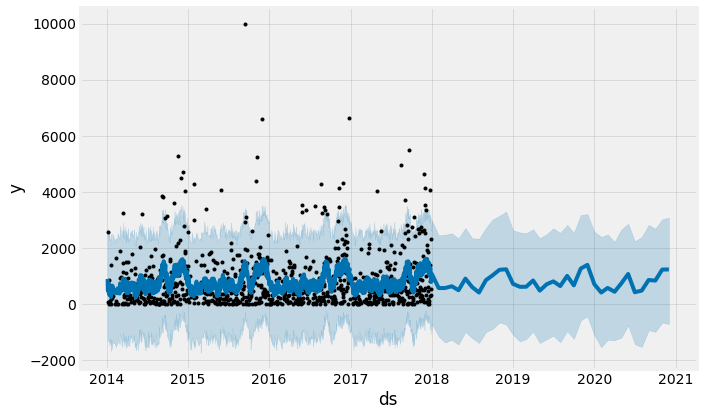

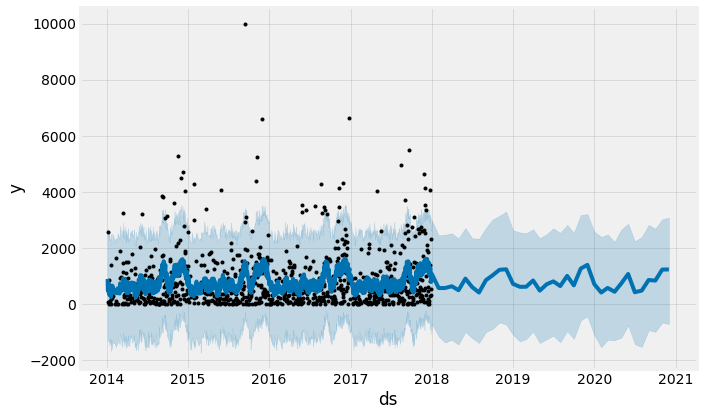

In [68]:
my_model.plot(forecast)